In [1]:
import numpy as np
import sympy as sp
from numpy import linalg 
import matplotlib.pyplot as plt

In [2]:
#integral
def I(a, b, xm, N):
    H = (b - a) / N
    X = np.zeros((N, 1))
    F = np.zeros((N, 1), dtype = np.complex)
    sum = 0
    for i in range(N):
        X[i] = (H / 2) + i * H + a      
        F[i] = np.log(1 / np.abs(xm - X[i])) 
        sum += F[i]
    return sum * H

#special integral I
def Int(u, v, i, N):
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1))
    for j in range(N):
        z[j] = halfH + j * h
           
    #middle
    def Func(x): 
        return (np.log(x) * np.power(x, i - 1)) / (np.sqrt(1 - (x + v)*(x + v)))
    for j in range(N):
        res = Func(z[j])
        F[j] = res
    
    sum = 0
    for j in range(N):
        sum += F[j]
    
    interior = h * sum
    return interior 

#beta
def beta(xm, h, N):
    if xm >= 0 and xm <= h:
        return - Int(xm, -xm, 1, N) + (1 / h) * Int(xm, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= h and xm <= 1 - h:
        return - Int(h, -xm, 1, N) + (1 / h) * Int(h, -xm, 2, N) - Int(h, xm, 1, N) + (1 / h) * Int(h, xm, 2, N)
    elif xm >= 1 - h and xm <= 1:
        return - Int(h, -xm, 1, N) + (1/h) * Int(h, -xm, 2, N) - Int(1-xm, xm, 1, N) + (1 / h) * Int(1-xm, xm, 2, N)
    else:
        print("error")
        return 0

In [3]:
def Processing(N):
    h = 1 / N

    XM = np.zeros((N, 1))
    for i in range(N):
        XM[i] = 0 + (h / 2) + i * h

    SN = np.zeros((N + 1, 1))
    for j in range(N + 1):
        SN[j] = 0 + j * h
    
    mat = np.zeros((N, N), dtype = np.complex)
    for m in range(N):
        for n in range(N):
            if n == m:
                mat[m, n] = beta(XM[m], h, N) * np.sqrt(1 - XM[m] * XM[m]) + 0 #LEGIT
            else:
                mat[m, n] = I(SN[n], SN[n + 1], XM[m], N) 

    right = np.full((N, 1), 1, dtype = np.complex)
    answer = linalg.solve(mat, right)

    res_real = np.real(answer)
    
    ############part with error
    
    S = np.zeros((N, 1))
    def sln(x):
        return 1 / (2 * np.pi * np.log(2) * np.sqrt(x * (1 - x)))
    for i in range(N):
        S[i] = sln(XM[i])
    
    extra = np.zeros((N - 4, 1))
    for i in range(N - 4):
        extra[i] = res_real[i + 2] - S[i + 2]
                                 
    norm = linalg.norm(extra)

    error = np.zeros((N - 4, 1))
    for i in range(N - 4):
        error[i] = np.abs(extra[i] / norm)

    average = np.sum(error)
    
    average /= (N - 4) #усредняем
    print("Average abs. error = ", average)

    #plt.plot(XM[2: N - 2], error, 'bo', color = 'green')
    #plt.grid()
    #plt.show()
    
    return XM, SN, res_real, S, error, N

In [4]:
res1 = Processing(50)

Average abs. error =  0.0774105453119143


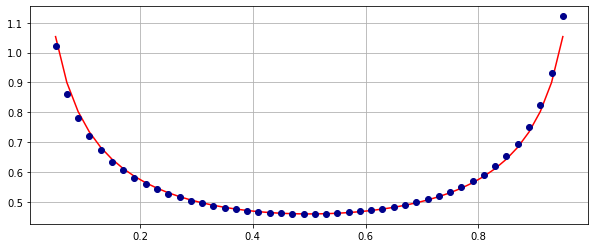

In [5]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.plot(res1[0][2: res1[5] - 2], res1[3][2: res1[5] - 2], color = 'red')
plt.plot(res1[0][2: res1[5] - 2], res1[2][2: res1[5] - 2], 'bo', color = 'darkblue')

#plt.xlim(0.0, 0.5)
#plt.ylim(0.4, 1.6)

plt.grid()
plt.show()

In [6]:
res2 = Processing(100)

Average abs. error =  0.04196078740319461


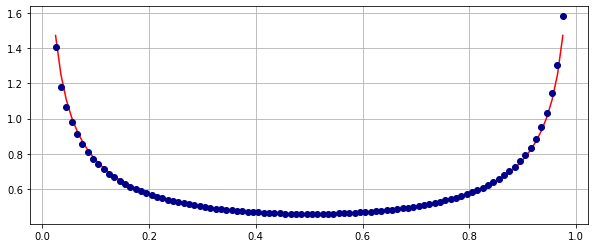

In [7]:
plt.plot(res2[0][2: res2[5] - 2], res2[3][2: res2[5] - 2], color = 'red')
plt.plot(res2[0][2: res2[5] - 2], res2[2][2: res2[5] - 2], 'bo', color = 'darkblue')

plt.grid()
plt.show()

In [8]:
res3 = Processing(200)

Average abs. error =  0.022281688117894334


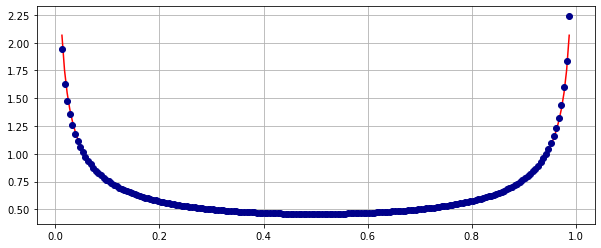

In [9]:
plt.plot(res3[0][2: res3[5] - 2], res3[3][2: res3[5] - 2], color = 'red')
plt.plot(res3[0][2: res3[5] - 2], res3[2][2: res3[5] - 2], 'bo', color = 'darkblue')

plt.grid()
plt.show()

In [10]:
def residual(xm, SN, results, N):
    extra1 = np.zeros((N - 4, 1))
    for i in range(N - 4):
        numSln1 = results[i + 2] * np.log(1 / np.abs(xm - SN[i + 2]))
        extra1[i] = numSln1 - 1

    norm1 = linalg.norm(extra1)
    print("norm = ", norm1)
    
    r1 = np.zeros((N - 4, 1))
    for i in range(N - 4):
        r1[i] = np.abs(extra1[i] / norm1)

    average1 = np.sum(r1)
    average1 /= (N - 4) 

    print("Average r = ", average1)

    plt.plot(SN[2 : N - 2], r1, 'bo', color = "brown", label = xm)

    plt.legend(bbox_to_anchor=(0.97, 0.97),
               bbox_transform=plt.gcf().transFigure)

    plt.ylabel("r")

    plt.grid()
    plt.show()

norm =  4.438412683260934
Average r =  0.13177234944977717


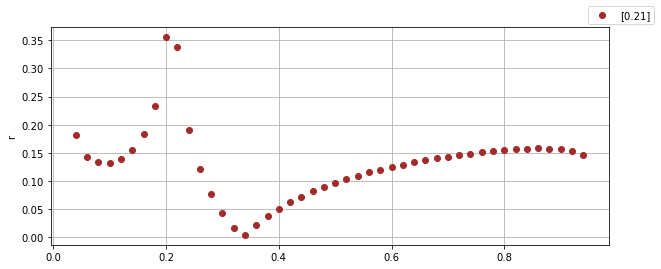

In [11]:
residual(res1[0][10], res1[1], res1[2], res1[5])

norm =  6.901041837526715
Average r =  0.0900298252173742


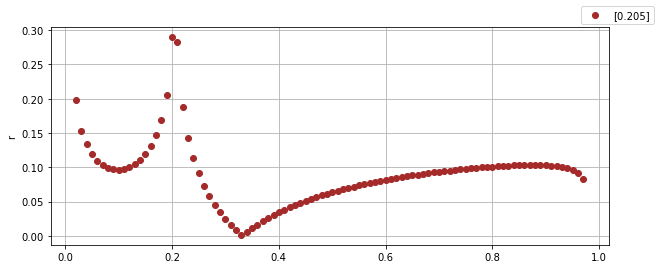

In [12]:
residual(res2[0][20], res2[1], res2[2], res2[5])

norm =  10.478253940519785
Average r =  0.06179772508801624


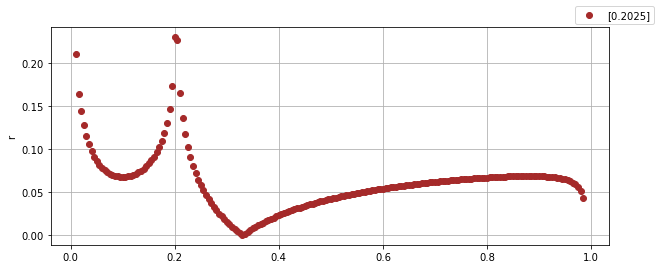

In [13]:
residual(res3[0][40], res3[1], res3[2], res3[5])